In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns# data visualization
import matplotlib as plt#data visuliazation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


**Reading the files**

In [2]:
train_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
train_copy=train_data.copy()#creating a copy

In [3]:
test_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')


In [4]:
sample_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')


In [5]:
train_copy.shape

(175000, 17)

In [6]:
train_copy.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [7]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

**Features and target variable description**

total_amount: The total amount paid by the traveler for the taxi ride.It is the target variable.

VendorID: An identifier for taxi vendors.

tpep_pickup_datetime and tpep_dropoff_datetime: Timestamps indicating pickup and dropoff times.

passenger_count: The number of passengers during the ride.

trip_distance: The distance traveled during the trip.

RatecodeID: Rate code for the ride.

store_and_fwd_flag: A flag indicating whether the trip data was stored and forwarded.

PULocationID and DOLocationID: Pickup and dropoff location identifiers.

payment_type: Payment type used for the ride.

In [8]:
train_copy.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


**Key Statistics & Relationships**

1) There are 175000 records and 17 attributes in the training dataset.


2) The Average trip_distance of the training dataset provided to us is 5.145 distance units.

3) The average passenger_count of the dataset is 1.358, highlighting the fact that most passengers prefer to travel alone.

4) The average extras,tip_amount and congestion surcharge play the key role in total amount.

5) The minimum amount in extras and tolls amount indicate late fees which the company might be paying to customers.



**Dummy Regressor Model**

In [9]:
# X = train_copy.drop(columns = ['total_amount'])
# X.head(3)

In [10]:
# y= train_copy['total_amount']
# y.head(3)

In [11]:
# from sklearn.dummy import DummyRegressor
# from sklearn.metrics import r2_score

# # Create a Dummy Regressor using the mean strategy
# dummy_reg = DummyRegressor(strategy="mean")

# # Fit the Dummy Regressor on the training data
# dummy_reg.fit(X, y)

# # Make predictions on the test set
# predictions = dummy_reg.predict(test_copy)



In [12]:
# predictions

In [13]:
# submission = pd.DataFrame(columns = ['total_amount'])
# # submission ['id'] = [ i for i in range (len(prediction))]
# submission ['total_amount'] = prediction
# submission.to_csv('submission.csv' , index_label = 'id' )

The Dummy Regressor Code gives you a R2 Score of -0.0993

In [14]:
# submission.head()

In [15]:
train_copy.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [16]:
train_copy['RatecodeID'].value_counts()

RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64

In [17]:
train_copy['PULocationID'].value_counts()       


PULocationID
264    730
85     725
43     719
162    718
97     717
      ... 
254    613
94     613
153    611
179    606
252    606
Name: count, Length: 264, dtype: int64

In [18]:
train_copy['DOLocationID'].value_counts()       


DOLocationID
263    759
127    736
37     729
115    726
254    721
      ... 
9      611
140    610
195    607
187    606
183    605
Name: count, Length: 264, dtype: int64

In [19]:
train_copy['payment_type'].value_counts()

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

**Some More Insights**

1) The most repeated RateCodeIDs are 1.0 and 2.0 .

2) The most common Pickup Location IDs are 264, 85, 43, 162 ,97 .

3) The most common Drop off Location IDs are 263, 127, 37,115, 254.

4) The most preferred payment type are of Credit Card and Cash.

**Performing Exploratory Data Analysis**

1)Remove duplicates.

2)Identify and handling Outliers.

3)Impute missing values with feature's mean for numeric features.

4)Use OneHot Encoding for categorical variables.

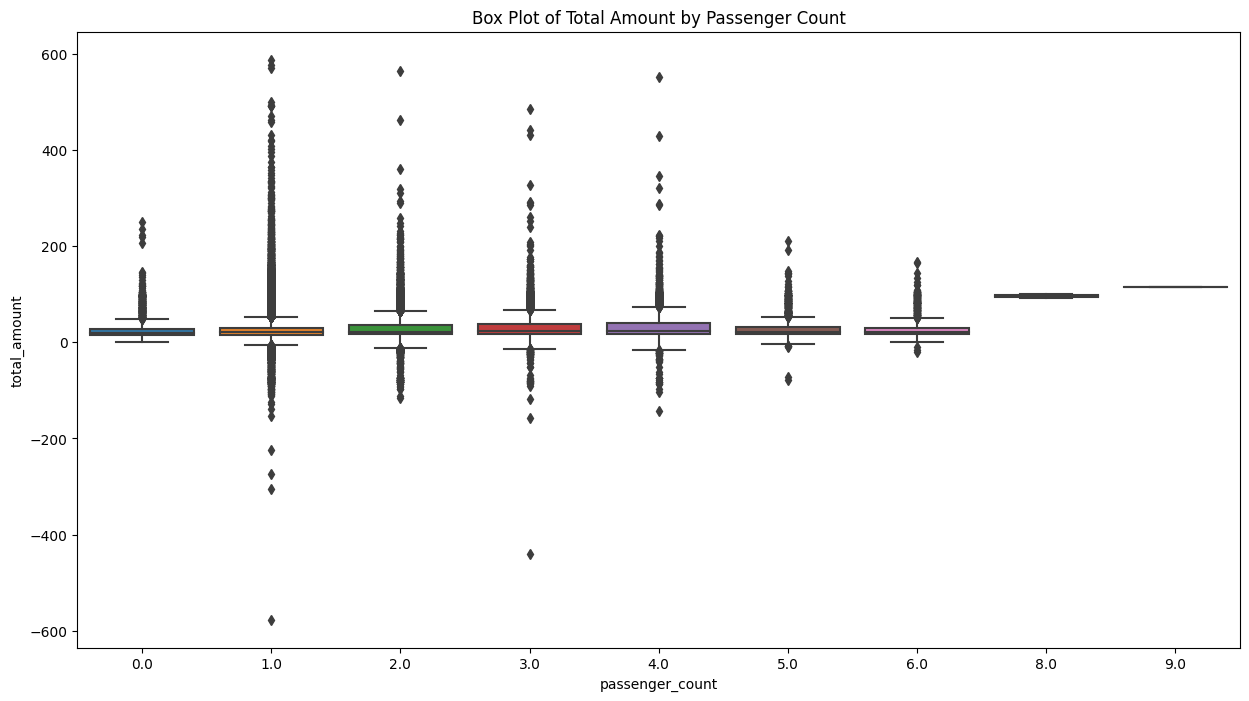

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(x='passenger_count', y='total_amount', data=train_copy)
plt.title('Box Plot of Total Amount by Passenger Count')
plt.show()

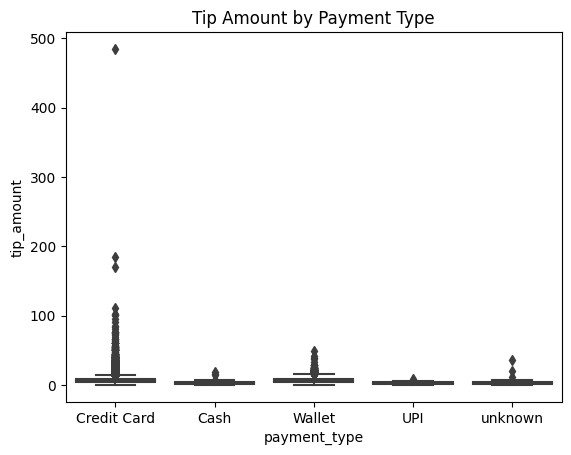

In [21]:
import seaborn as sns

sns.boxplot(x='payment_type', y='tip_amount', data=train_copy)
plt.title('Tip Amount by Payment Type')
plt.show()

In [22]:
negative_total_amount = train_copy[train_copy['total_amount'] < 0]
negative_total_amount.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,1725.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
passenger_count,1725.0,1.385507,0.782879,1.000000,1.000000,1.000000,2.000000,6.00000
trip_distance,1725.0,3.317235,5.761849,0.000000,0.320000,1.190000,3.060000,83.69000
RatecodeID,1725.0,1.205797,0.681178,1.000000,1.000000,1.000000,1.000000,5.00000
PULocationID,1725.0,132.743768,77.122235,1.000000,63.000000,133.000000,199.000000,264.00000
DOLocationID,1725.0,134.882899,78.767928,1.000000,62.000000,138.000000,205.000000,264.00000
extra,1725.0,-1.371014,1.544966,-7.500000,-2.500000,-1.000000,0.000000,0.00000
tip_amount,1725.0,2.625304,1.831323,0.000079,1.292728,2.618123,3.867927,36.19792
tolls_amount,1725.0,-0.541739,2.142528,-29.300000,0.000000,0.000000,0.000000,0.00000
improvement_surcharge,1725.0,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000


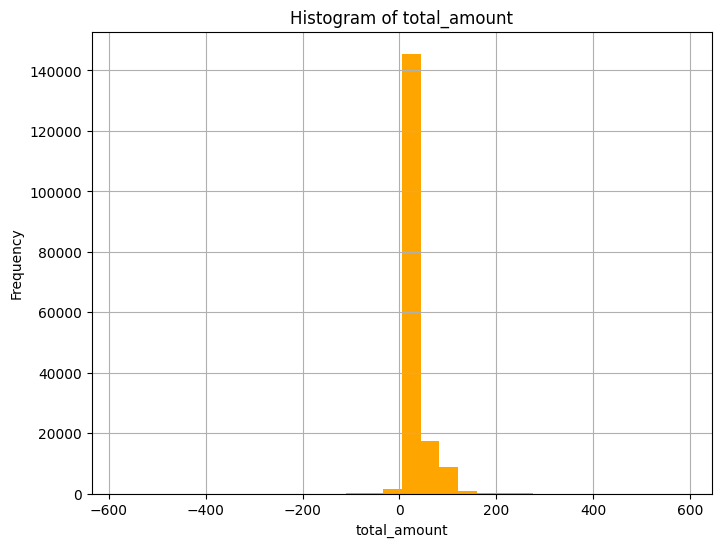

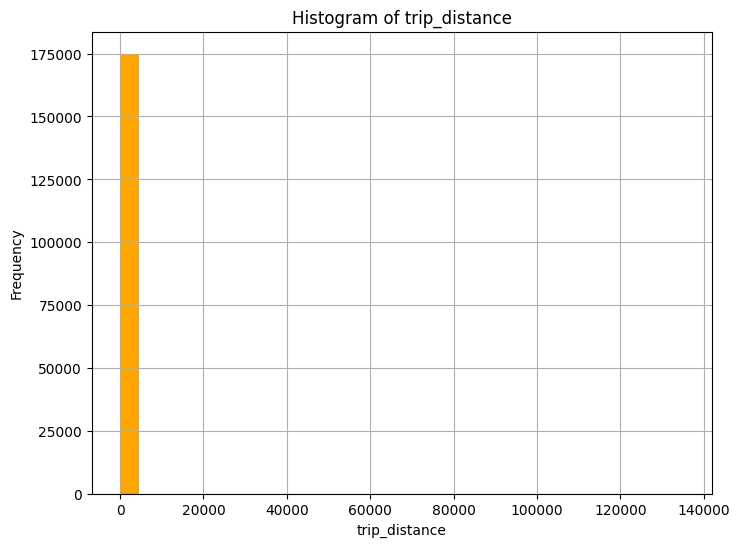

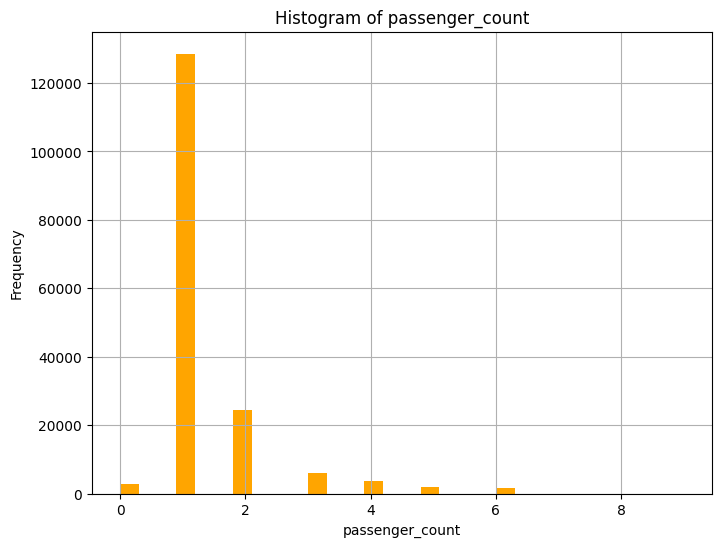

In [23]:

# Selected features for histograms
features = ['total_amount', 'trip_distance', 'passenger_count']

# Plotting histograms for selected features
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(train_copy[feature], bins=30, color='orange')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [24]:
dist = train_copy[train_copy['trip_distance'] > 100]
dist

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
55147,1,2023-06-29 15:53:29,2023-06-29 15:52:58,1.0,9673.69,1.0,N,107,228,Credit Card,0.00,6.042202,0.00,1.0,9.60,0.0,0.00
59599,0,2023-06-29 23:18:24,2023-06-30 02:56:23,1.0,132.10,1.0,N,92,234,Cash,2.75,3.682359,6.55,1.0,494.00,0.0,1.75
70458,1,2023-06-30 23:03:21,2023-07-01 00:16:10,NaN,20314.00,NaN,NaN,249,84,Wallet,0.00,9.657420,0.00,1.0,42.56,NaN,NaN
85525,1,2023-06-29 05:23:56,2023-06-29 04:33:47,NaN,135182.06,NaN,NaN,133,80,Wallet,0.00,5.948871,0.00,1.0,27.92,NaN,NaN
107988,1,2023-06-29 03:32:14,2023-06-29 04:57:15,NaN,92292.43,NaN,NaN,55,71,Wallet,0.00,4.262185,0.00,1.0,18.00,NaN,NaN
153336,1,2023-06-29 11:58:25,2023-06-29 13:27:50,1.0,104.09,5.0,N,242,30,Cash,0.00,0.380620,19.30,1.0,470.30,0.0,0.00
165589,1,2023-06-29 06:09:30,2023-06-29 08:30:26,2.0,143.35,5.0,N,209,115,Credit Card,0.00,0.951270,6.55,1.0,359.30,0.0,1.75


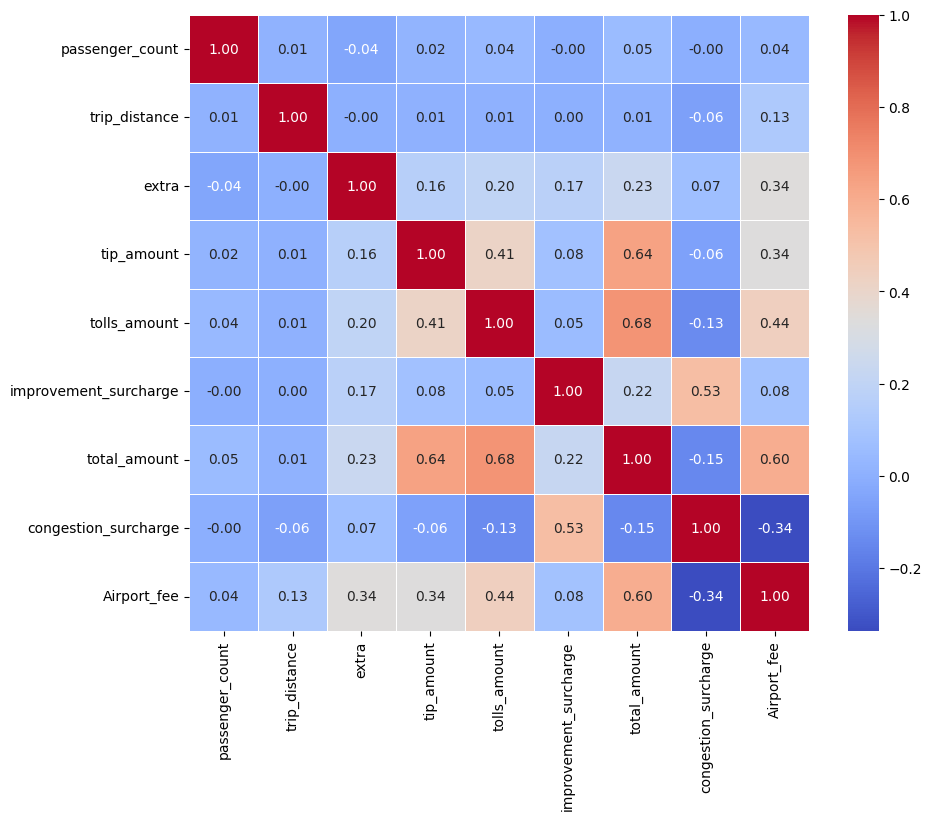

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features1 = ['passenger_count', 'trip_distance', 'extra', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

# Assuming train_copy is your DataFrame
correlation_matrix = train_copy[numerical_features1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


**Highlights from Exploratory Data Analysis**

1) For Numerical Features, total amount is affected by tolls_amount,tip_amount and Airport_fee.

2) Some features are negatively correlated like Airport Fee and congestion surcharge.

3) Some outliers can be noticed while paying tip via credit card.

4) Box Plot also highlights some negative outliers which may suggest that Taxi company might have faced certain penalties or late fees. In this case, outliers are not removed as significant chunk of data will be lost.

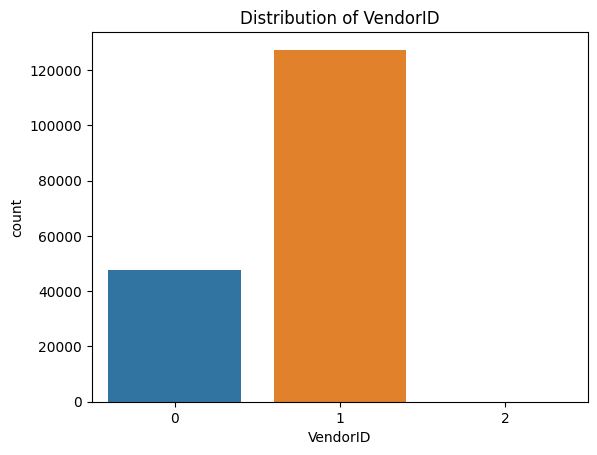

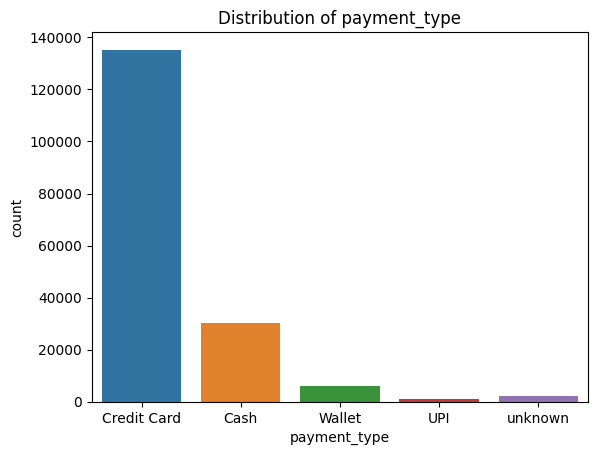

In [26]:
categorical_feature = ['VendorID','payment_type']

for feature in categorical_feature:
    sns.countplot(x=feature, data=train_copy)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Finding Missing Value**

In [27]:
missing_values=train_copy.isnull().sum()
missing_values

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [28]:
# Splitting categorical and numerical features 
categorical_features = train_copy.select_dtypes(['object']).columns.tolist()
numerical_features = train_copy.select_dtypes(['int','float']).columns.tolist()

In [29]:
print(categorical_features)
print(numerical_features)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'payment_type']
['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


**Imputation Of Missing Values**

In [30]:
train_copy['passenger_count'].fillna(train_copy['passenger_count'].median(), inplace=True)
train_copy['RatecodeID'].fillna(train_copy['RatecodeID'].median(),inplace=True)
train_copy['congestion_surcharge'].fillna(train_copy['congestion_surcharge'].median(),inplace=True)
train_copy['Airport_fee'].fillna(train_copy['Airport_fee'].median(),inplace=True)

mode_value = train_copy['store_and_fwd_flag'].mode()[0]
train_copy['store_and_fwd_flag'].fillna(mode_value,inplace=True)

1) For Categorical feature like store_and_fwd_flag , mode value is chosen for imputation.

2) For Numerical features passenger count, congestion surcharge,airport fee median value is chosen.

In [31]:
train_copy.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [32]:
# 2. Encode Categorical Variables
# Perform one-hot encoding for categorical variables
encoded_data = pd.get_dummies(train_copy[['store_and_fwd_flag', 'payment_type']], drop_first=True)

# Concatenate numerical and encoded categorical features
processed_data = pd.concat([train_copy[numerical_features], encoded_data], axis=1)

**Converting Pickup_datetime from Object to Datetime**

In [33]:
train_copy['tpep_pickup_datetime'] = pd.to_datetime(train_copy['tpep_pickup_datetime'])
train_copy['tpep_dropoff_datetime'] = pd.to_datetime(train_copy['tpep_dropoff_datetime'])

processed_data['duration'] = (train_copy['tpep_dropoff_datetime'] - train_copy['tpep_pickup_datetime']).dt.total_seconds()/60

In [34]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               175000 non-null  int64         
 1   tpep_pickup_datetime   175000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  175000 non-null  datetime64[ns]
 3   passenger_count        175000 non-null  float64       
 4   trip_distance          175000 non-null  float64       
 5   RatecodeID             175000 non-null  float64       
 6   store_and_fwd_flag     175000 non-null  object        
 7   PULocationID           175000 non-null  int64         
 8   DOLocationID           175000 non-null  int64         
 9   payment_type           175000 non-null  object        
 10  extra                  175000 non-null  float64       
 11  tip_amount             175000 non-null  float64       
 12  tolls_amount           175000 non-null  floa

In [35]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   VendorID                  175000 non-null  int64  
 1   passenger_count           175000 non-null  float64
 2   trip_distance             175000 non-null  float64
 3   RatecodeID                175000 non-null  float64
 4   PULocationID              175000 non-null  int64  
 5   DOLocationID              175000 non-null  int64  
 6   extra                     175000 non-null  float64
 7   tip_amount                175000 non-null  float64
 8   tolls_amount              175000 non-null  float64
 9   improvement_surcharge     175000 non-null  float64
 10  total_amount              175000 non-null  float64
 11  congestion_surcharge      175000 non-null  float64
 12  Airport_fee               175000 non-null  float64
 13  store_and_fwd_flag_Y      175000 non-null  b

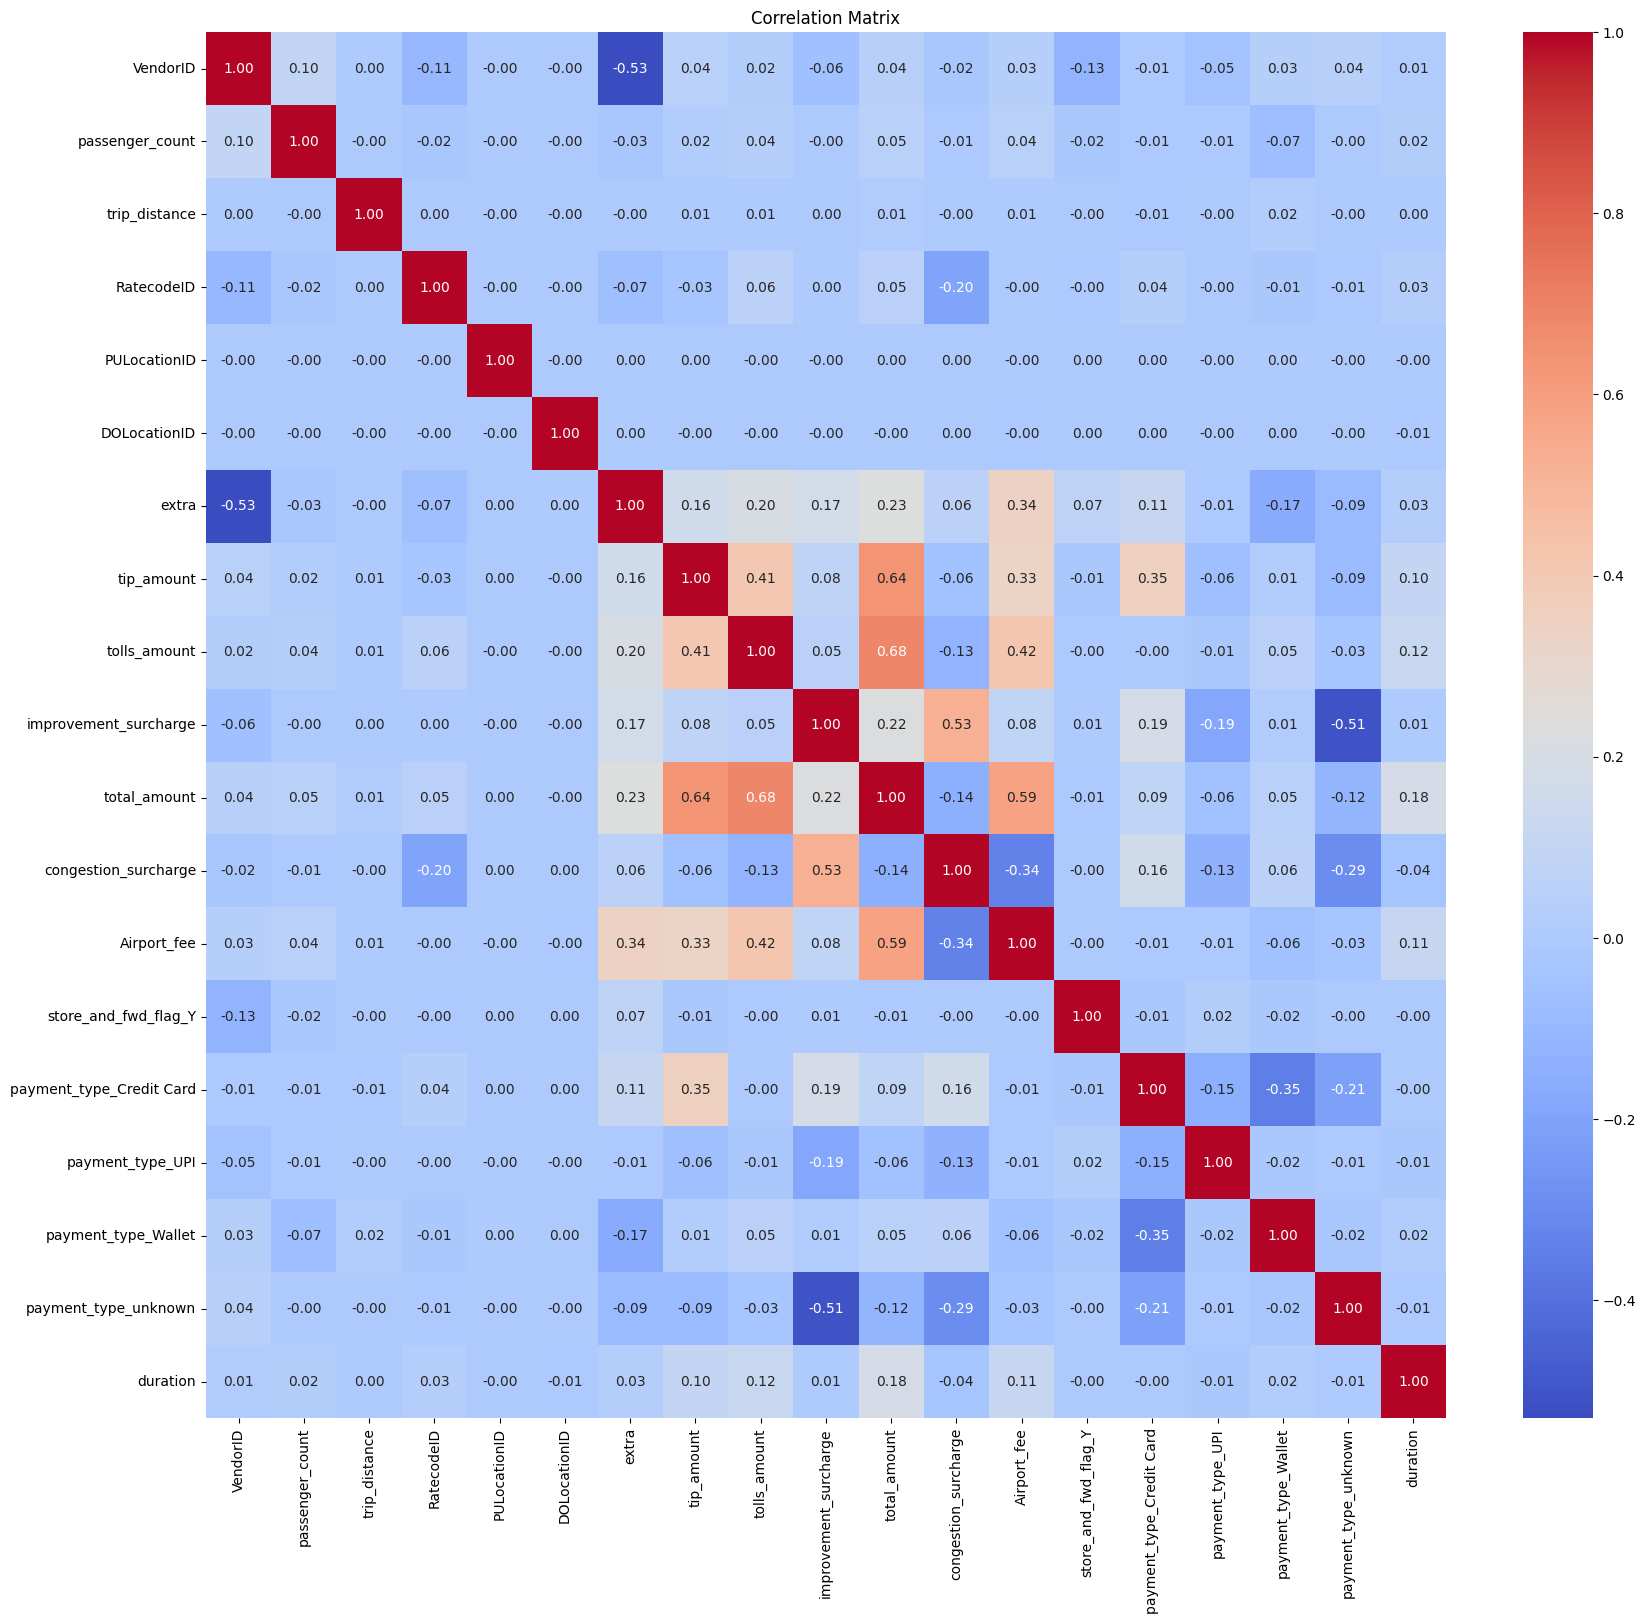

In [36]:
# 4. Creating Correlation Matrix
# Compute correlation matrix using Pearson for numerical and Point Biserial for mixed data types
correlation_matrix_numerical = processed_data.corr(method='pearson')

# 5. Visualize the Correlation Matrix
# Generate heatmap using Seaborn
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

**Training & Test Data**

In [37]:
from sklearn.model_selection import train_test_split

X = train_copy.drop('total_amount', axis = 1)
y = train_copy['total_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler

# Implementing Feature engineering
# Function to calculate duration from pickup and dropoff datetime
def calculate_duration(X):
    X['tpep_pickup_datetime'] = pd.to_datetime(X['tpep_pickup_datetime'])
    X['tpep_dropoff_datetime'] = pd.to_datetime(X['tpep_dropoff_datetime'])
    X['duration'] = (X['tpep_dropoff_datetime'] - X['tpep_pickup_datetime']).dt.total_seconds() / 60
    return X[['duration']]

# Define numerical, categorical and datetime features
# numerical_features = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee']

numerical_features = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount', 
 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

categorical_features = ['store_and_fwd_flag', 'payment_type']

datetime_features = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

# Create pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Create final pipeline for all steps
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
    ('duration', FunctionTransformer(calculate_duration), datetime_features)
])

# Process the data
X_train = full_pipeline.fit_transform(X_train, y_train)

In [39]:
X_test = full_pipeline.transform(X_test)

In [40]:
X_train.shape,X_test.shape

((140000, 16), (35000, 16))

**Implementing PCA to improve model selection**

In [41]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler


# # Apply PCA
# pca = PCA(n_components=10)

# # Training PCA with train data
# X_train = pca.fit_transform(X_train)

# # Implementing the training info on test data
# X_test = pca.transform(X_test)

**MODEL 1: LINEAR REGRESSION MODEL**

In [42]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# # Initialize the Linear Regression model
# model = LinearRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions using the testing set
# y_pred = model.predict(X_test)

# # Model evaluation
# mse = mean_squared_error(y_test, y_pred)
# mae=mean_absolute_error(y_test,y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")



1. Linear Regression Results:
Mean Squared Error (MSE): 178.48
Comment: The MSE obtained using Linear Regression is significantly high.
R2 Score (Train): 0.725
Comment: The R2 score on the training data indicates the proportion of variance explained by the model.
R2 Score (Test): 0.648
Comment: The R2 score on the test data is slightly lower than the training R2 score, suggesting potential overfitting.
2. Comparison with Random Forest Regressor:
Comment: The MSE from Linear Regression is much higher compared to the performance of the Random Forest Regressor.
Comment: Consideration of alternative models may be warranted, given the observed performance difference.
3. Effect of PCA Implementation:
Comment: The implementation of Principal Component Analysis (PCA) results in a reduction of the R2 score to 0.71.
Comment: PCA might be impacting the model's ability to capture variance, and careful consideration is needed when applying dimensionality reduction techniques.
This organized presentation highlights the key performance metrics, provides a comparison with another model (Random Forest Regressor), and notes the impact of PCA on the model's performance.

**MODEL 2: RANDOM FOREST REGRESSOR**

In [43]:
# from sklearn.ensemble import RandomForestRegressor


# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)


# # Train the model
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared (R2) Score:", r2)

# # Get the coefficients (weights)
# coefficients = model.coef_
# intercept = model.intercept_

# print("Coefficients:", coefficients)
# print("Intercept:", intercept)

1. Random Forest Regressor (RFR) Results Without Hyperparameter Tuning:
Mean Squared Error (MSE): 28.895
Comment: The MSE obtained by the Random Forest Regressor without hyperparameter tuning is relatively low, indicating good predictive performance.
R2 Score (Train): 0.955
Comment: The high R2 score on the training data (0.955) suggests that the model explains a substantial proportion of the variance in the training dataset.
R2 Score (Test): 0.939
Comment: The high R2 score on the test data (0.939) indicates good generalization performance.
2. Random Forest Coefficients:
Comment: Random Forest Regressors typically do not have coefficients like linear models. Instead, feature importance can be derived from the model, indicating the importance of each feature for predictive performance.
3. Effect of PCA Implementation:
R2 Score After PCA (10 Components): 0.88
Comment: After applying Principal Component Analysis (PCA) with 10 components, the R2 score is reduced to 0.88.
Increase in MSE After PCA
Comment: The MSE increases after PCA, suggesting that the model's ability to accurately predict the target variable is impacted by dimensionality reduction.

**MODEL3: GRADIENT BOOSTING REGRESSOR**

In [44]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import r2_score

# # Initialize the Gradient Boosting Regressor
# gradient_boosting = GradientBoostingRegressor()

# # Fit the model
# gradient_boosting.fit(X_train, y_train)

# # Make predictions
# y_pred = gradient_boosting.predict(X_test)

# # R2 score
# r2 = r2_score(y_test, y_pred)
# print(f"R2 score: {r2:.4f}")

# # Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.4f}")

1. Gradient Boosting Regressor Results With Default Parameters:
R2 Score: 0.942
Comment: The R2 score of 0.942 obtained with default parameters in the Gradient Boosting Regressor indicates a high level of explained variance in the target variable.
Mean Squared Error (MSE): 37.787
Comment: The MSE of 37.787 is a measure of the average squared difference between predicted and actual values, and the obtained value suggests a relatively low error.
2. Effect of PCA Implementation:
Comment: The performance of the Gradient Boosting Regressor is negatively impacted after applying Principal Component Analysis (PCA).
Comment: PCA may have reduced the model's ability to capture important patterns in the data, resulting in a decrease in predictive performance.

**MODEL4: XGBOOST REGRESSOR**

In [45]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [ 0.8, 0.9, 1],
    'colsample_bytree': [ 0.8, 0.9, 1]
}

# # Create the XGBoost regressor
# xgb = XGBRegressor()

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=5, verbose=2, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

**Hyperparameter tunning result**

Got grid_search.best_params_ as :

'colsample_bytree': 0.9,
'learning_rate': 0.1,
'max_depth': 6,
'min_child_weight': 3,
'subsample': 1

In [46]:
best_params = {'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'subsample': 1}

In [47]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV


# # Create an XGBoost regressor
# xgb_regressor = xgb.XGBRegressor(**best_params)

# # Fit the model on the training data
# xgb_regressor.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = xgb_regressor.predict(X_test)

# # Evaluate the model
# from sklearn.metrics import r2_score, mean_squared_error

# # R2 score
# r2 = r2_score(y_test, y_pred)
# print(f"R2 score: {r2:.4f}")

# # Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.4f}")

1. XGBoost Regressor Results With Default Parameters:
R2 Score: 0.9584
Comment: The XGBoost Regressor achieves a high R2 score of 0.9584 with default parameters, indicating strong performance in explaining the variance in the target variable.
Mean Squared Error (MSE): 27.095
Comment: The MSE of 27.095 is a relatively low measure of prediction error, suggesting accurate predictions.
2. Effect of PCA Implementation:
Comment: Similar to other models, applying Principal Component Analysis (PCA) results in a reduction in the model's performance for XGBoost.
Comment: PCA might be affecting the model's ability to capture complex patterns in the data, leading to a decrease in predictive accuracy.
3. Hyperparameter Tuning for XGBoost:
Improved R2 Score After Hyperparameter Tuning: 0.9468 (from 0.9422)
Comment: Tuning the hyperparameters of XGBoost results in an improved R2 score, indicating that fine-tuning parameters can enhance the model's performance.

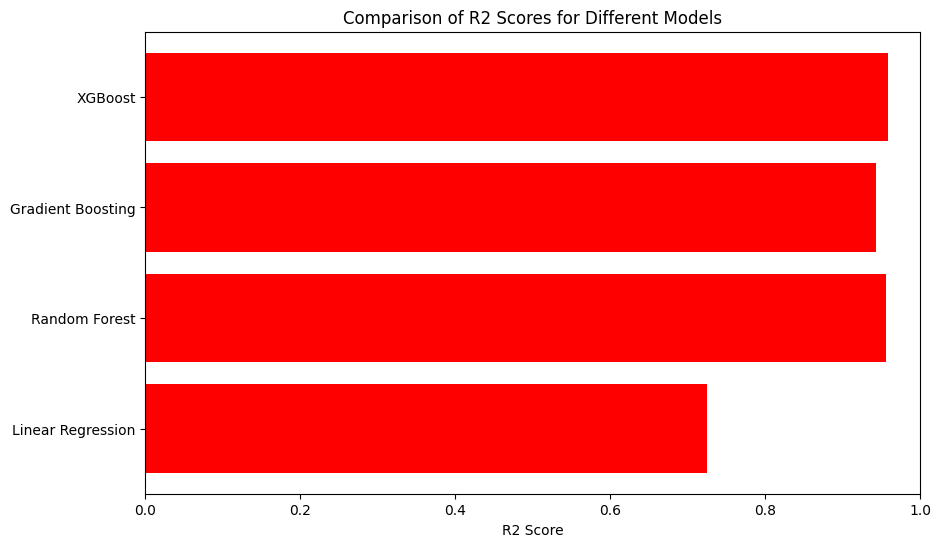

In [48]:
import matplotlib.pyplot as plt

# List of models and their corresponding R2 scores
models = ['Linear Regression', 'Random Forest','Gradient Boosting','XGBoost']
r2_scores = [0.725, 0.955, 0.942 ,0.958]

# Plotting the R2 scores
plt.figure(figsize=(10, 6))
plt.barh(models, r2_scores, color='red')
plt.xlabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.xlim(0, 1)  # Set the limit of the x-axis from 0 to 1 (R2 score range)
plt.show()

**Final Model Training**

In [49]:
features = train_copy.drop('total_amount', axis = 1)
label_vector = train_copy['total_amount']

In [50]:
features = full_pipeline.transform(features)

In [51]:
import xgboost as xgb


# Creating an XGBoost regressor
xgb_regressor_final = xgb.XGBRegressor(**best_params)

# Fiting the model
xgb_regressor_final.fit(features, label_vector)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [54]:
# Passing the test dataset with the pipeline without showing Y_test
processed_data = full_pipeline.transform(test_data)

In [55]:
# Model 1. Linear Regression
# output_lr = model.predict(processed_data)

In [56]:
#Model 2. Random Forest Regressor
# output_rf = rf.predict(processed_data)

In [57]:
# Model 3. XGBoost
# output_xgb = xgb_regressor.predict(processed_data)

In [58]:
# Model 4. Gradient Boosting
# output_gbr = gradient_boosting.predict(processed_data)

In [59]:
# Final model XGboost Fitted on whole dataset with best parameters
output_xgb = xgb_regressor_final.predict(processed_data)

Since XGBOOST Regressor gave the highest score on the training data, and gave the lowest mean squared error, we used it as our final model.

**Final Submission**

In [60]:
output_xgb = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output_xgb})
print(output_xgb)
output_xgb.to_csv("submission.csv", index=False)

          ID  total_amount
0          1     33.872433
1          2     24.964161
2          3     16.275692
3          4     14.941721
4          5     24.774433
...      ...           ...
49995  49996     15.204608
49996  49997     28.011806
49997  49998     20.732632
49998  49999     36.015846
49999  50000     17.322836

[50000 rows x 2 columns]
